In [43]:
import torch
import torch.nn as nn

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [45]:
# Define one layer with two neuron and two input without activation function (Linear)
model0 = nn.Sequential(nn.Linear(2, 2, bias = False), nn.ReLU(),
                      nn.Linear(2, 2, bias = False), nn.Softmax(2) ) 
model0.to(device) # Save model in gpu memory

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=False)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=False)
  (3): Softmax(dim=2)
)

In [46]:
n_points = 1_000 # Number of inputs example
X = torch.randn(n_points,2).to(device) # Random input (100, 2)

In [47]:
from torchsummary import summary
summary(model0, (1000,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1000, 2]               4
              ReLU-2              [-1, 1000, 2]               0
            Linear-3              [-1, 1000, 2]               4
           Softmax-4              [-1, 1000, 2]               0
Total params: 8
Trainable params: 8
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.00
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [48]:
# Sow weights of our neural network
for param in model.parameters():
    print(param.data)

tensor([[5., 0.],
        [0., 5.]])


Text(0.5, 1.0, 'tanh figure')

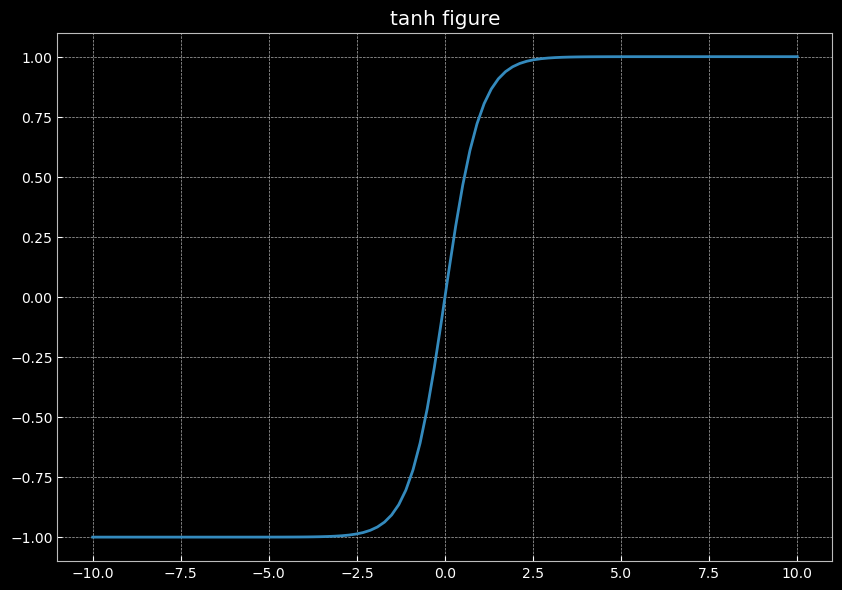

In [49]:
import matplotlib.pyplot as plt
z = torch.linspace(-10, 10, 100)    # 10 example point from -10 to 10
s = torch.tanh(z)   # calculate tanh

# def an style for plot
def set_style():
    plt.style.use(['dark_background', 'bmh'])   
    figsize = (10,7)
    dpi = 100
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
set_style()

plt.plot(z,s)
plt.title("tanh figure")





In [50]:
# torch.save(model0, "model_file.nn") # Save model to show it in neutron

In [51]:
# Define a single layer NN with two neuron and two output with tanh activation function
model1 = nn.Sequential(nn.Linear(2, 2, bias = False), nn.Tanh())
summary(model, (1000,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1000, 2]               4
              Tanh-2              [-1, 1000, 2]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


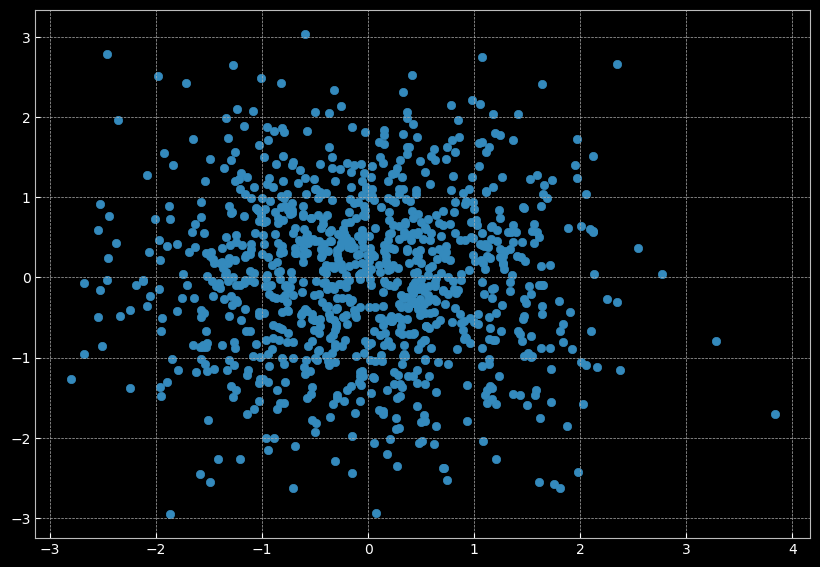

In [52]:
plt.scatter(X[:,0],X[:,1]) # Plot input of model network (1000 input example)

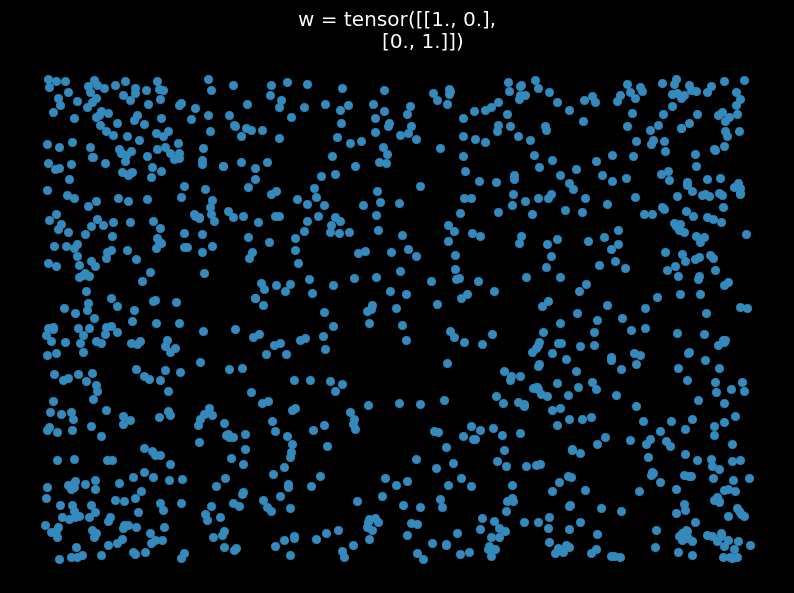

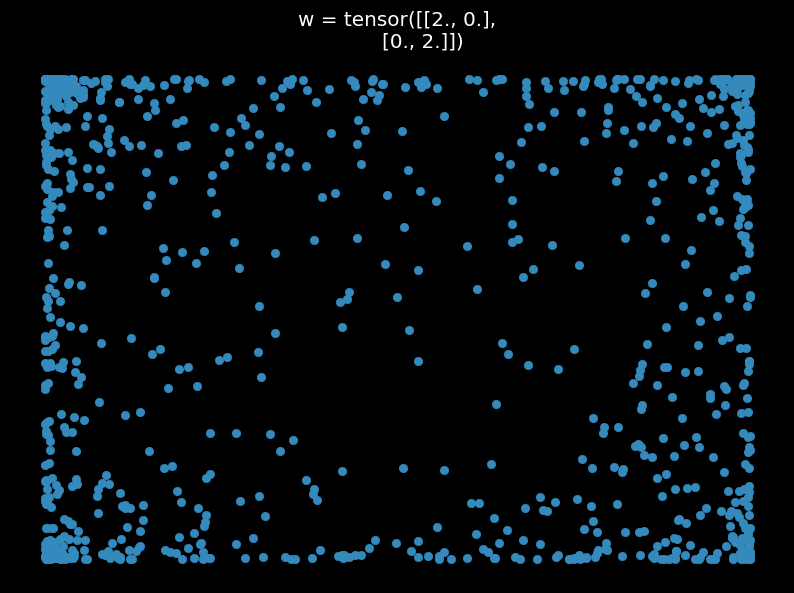

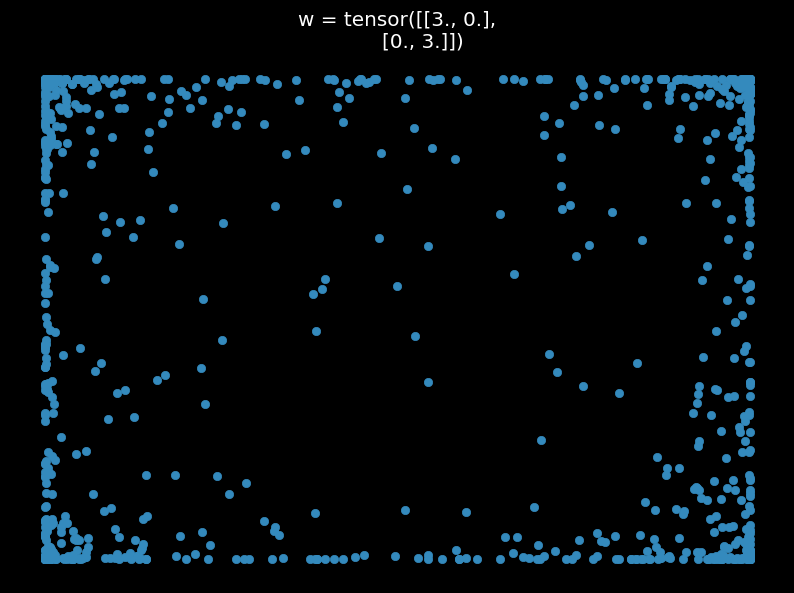

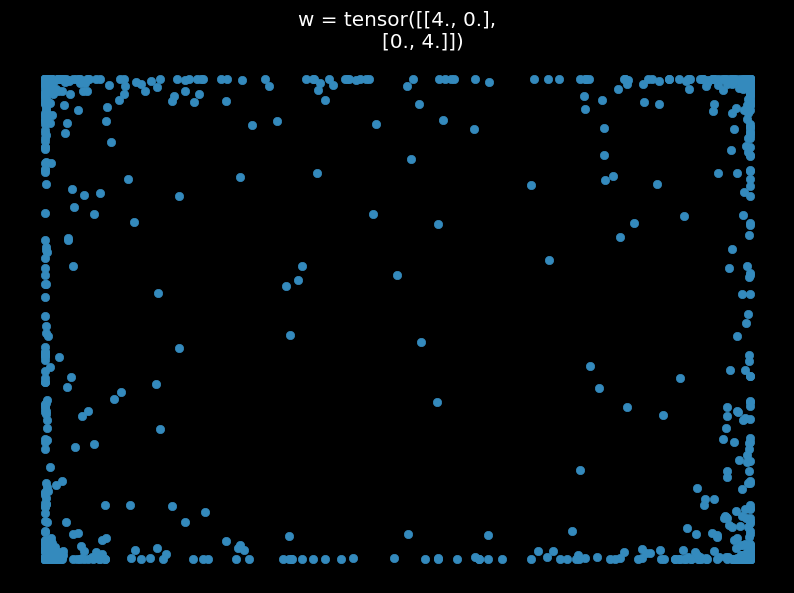

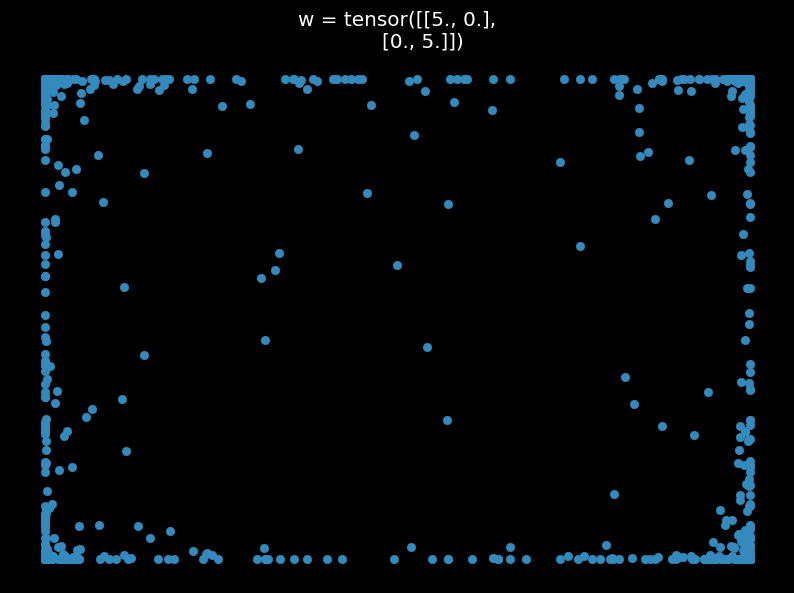

In [53]:
# Use our networ with calculate output and plot them (we spacially change input location with eye matrix)
for i in range(1,6):
    w = i * torch.eye(2)    # define weight matrix
    model1[0].weight.data.copy_(w)  # assign weights to our model
    Y = model1(X).data  # calculate the output of model with our inputs
    plt.scatter(Y[:,0], Y[:,1])
    plt.title(f"w = {w.data}")
    plt.axis("off")
    plt.show()

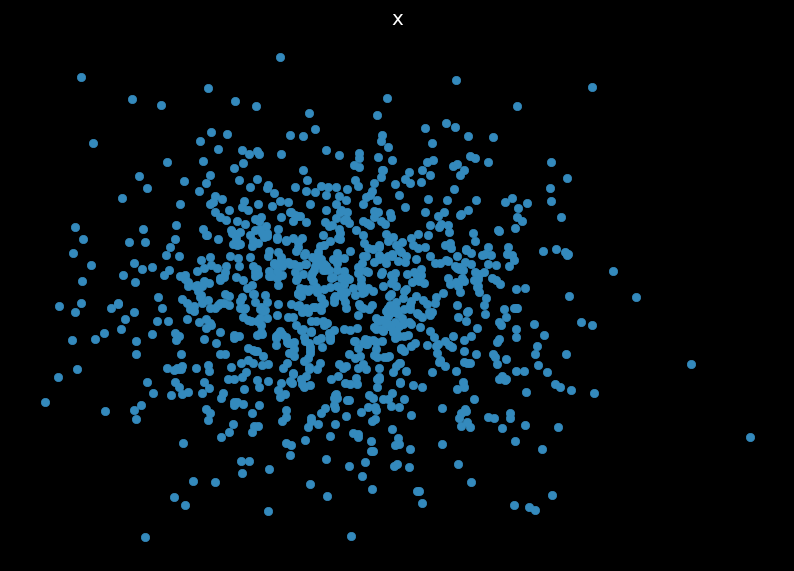

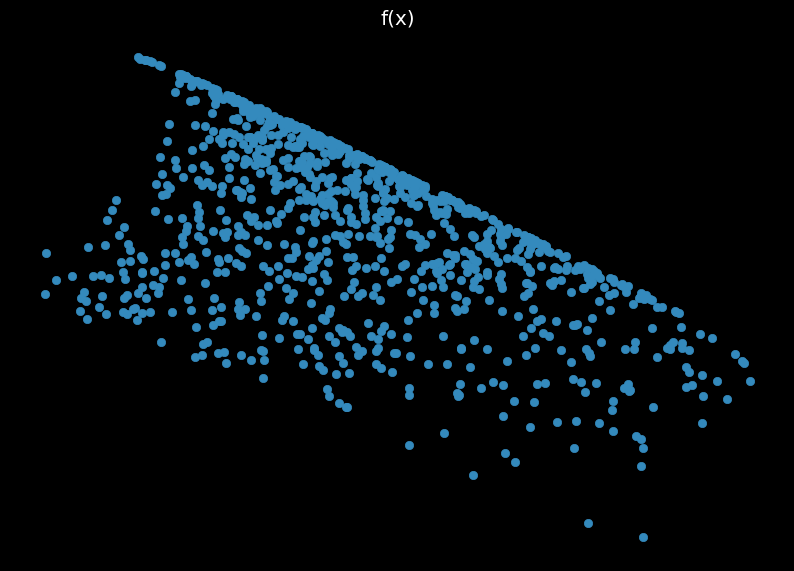

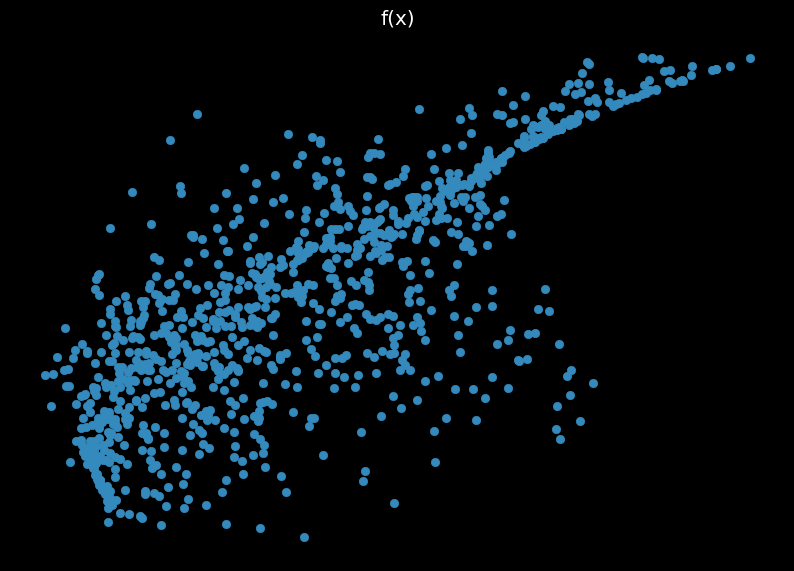

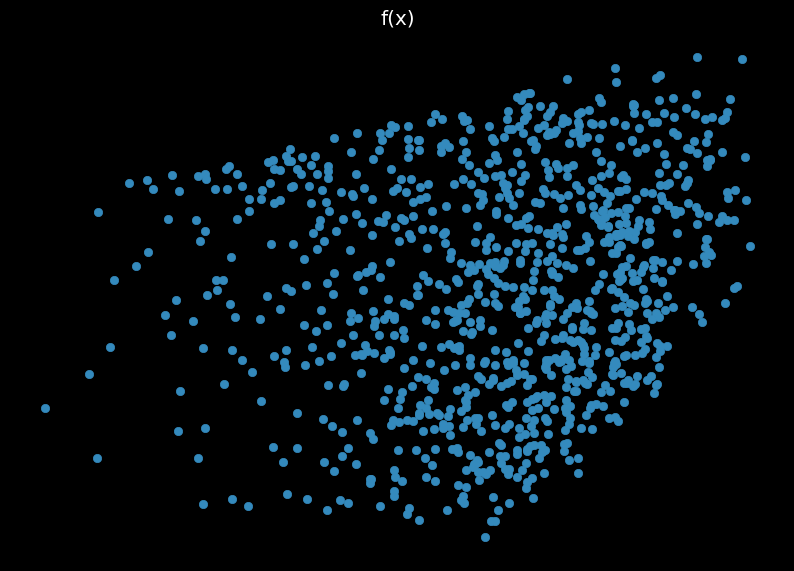

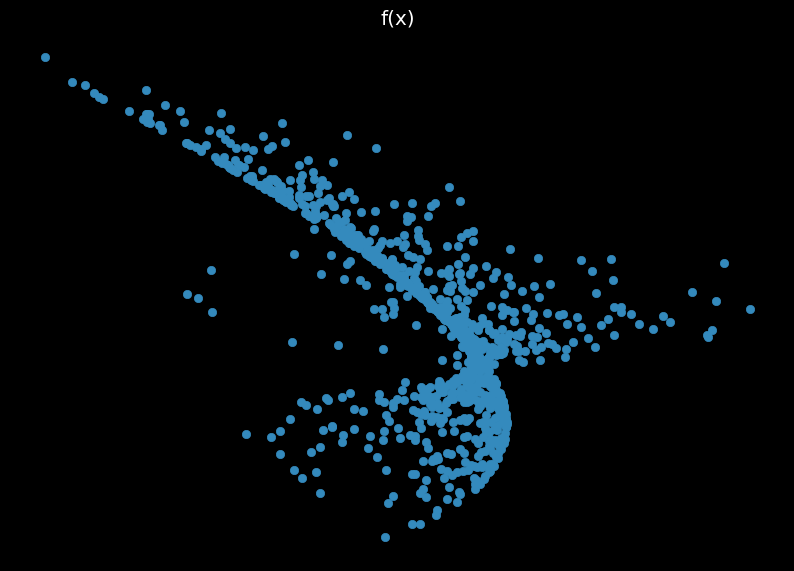

In [54]:
# Plot an net with 1 hidden layer with 5 neuron and tanh activation function in hidden layer
plt.scatter(X[:,0], X[:,1])
plt.title("x")
plt.axis("off")
plt.show()

n_hidden = 5    # number of neuron in hidden layer
AF = nn.Tanh()  # our hidden layer activation function

for i in range(4):  
    model2 = nn.Sequential(nn.Linear(2, n_hidden), AF,  # Define our model
                        nn.Linear(n_hidden, 2))
    model2.to(device)   # assing model to gpu
    with torch.no_grad():   # plot output of model with our input
        Y = model2(X)
        plt.scatter(Y[:,0], Y[:,1])
        plt.axis("off")
        plt.title("f(x)")
        plt.show()

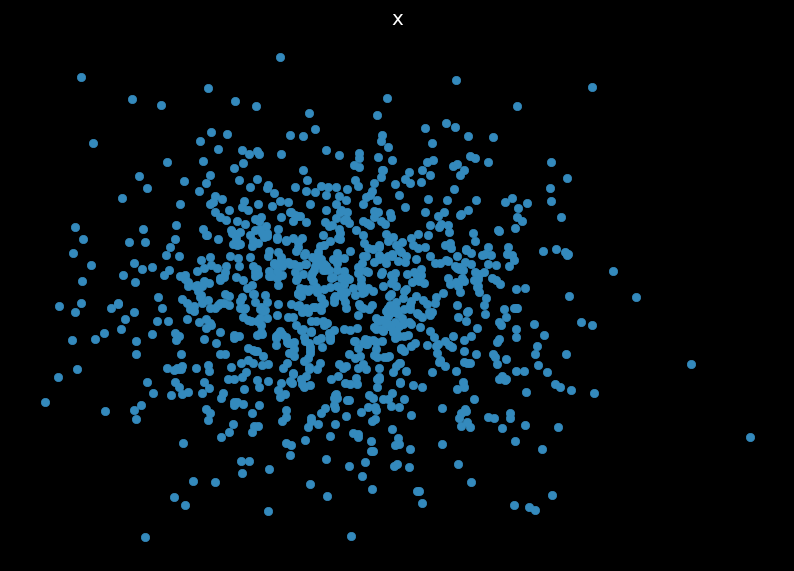

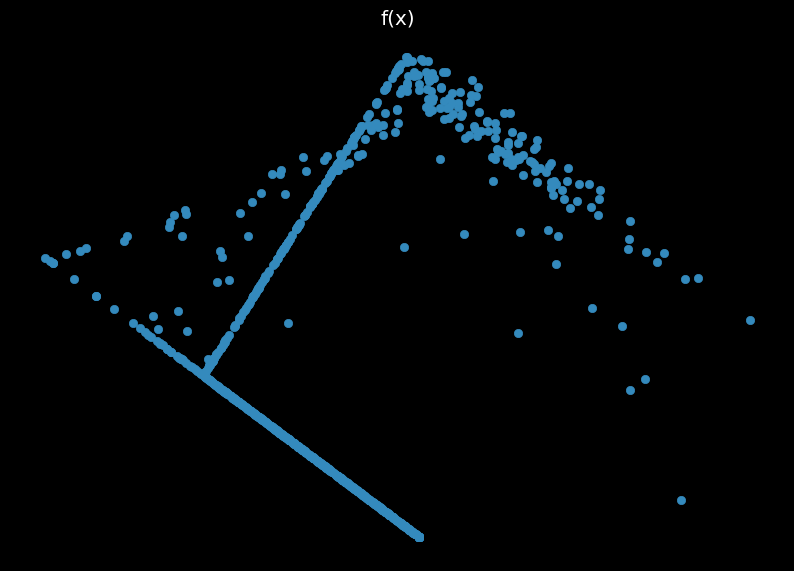

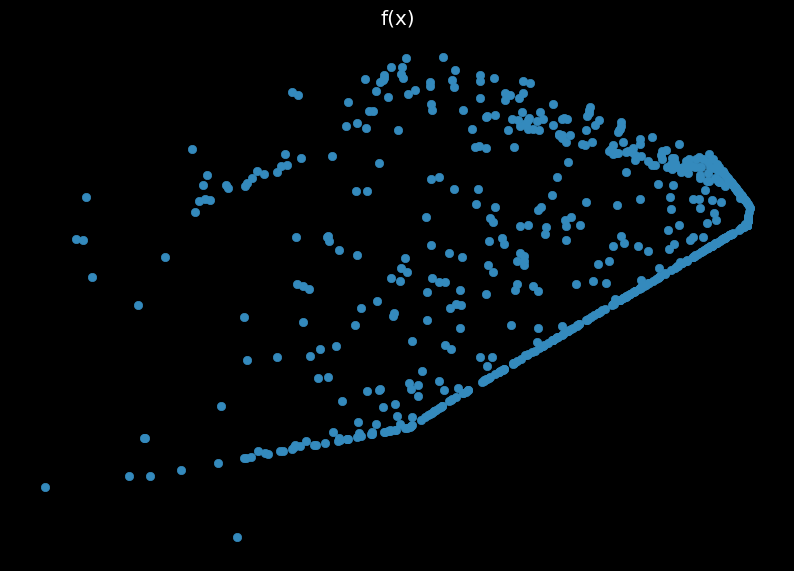

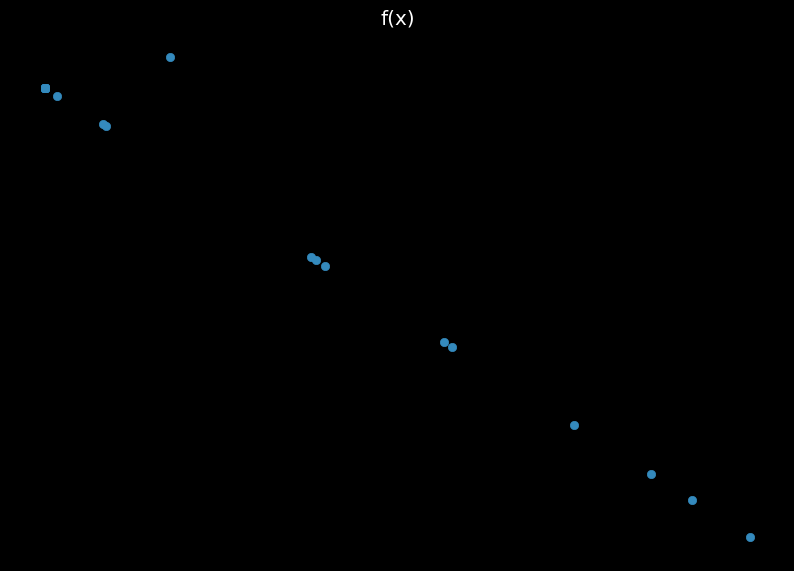

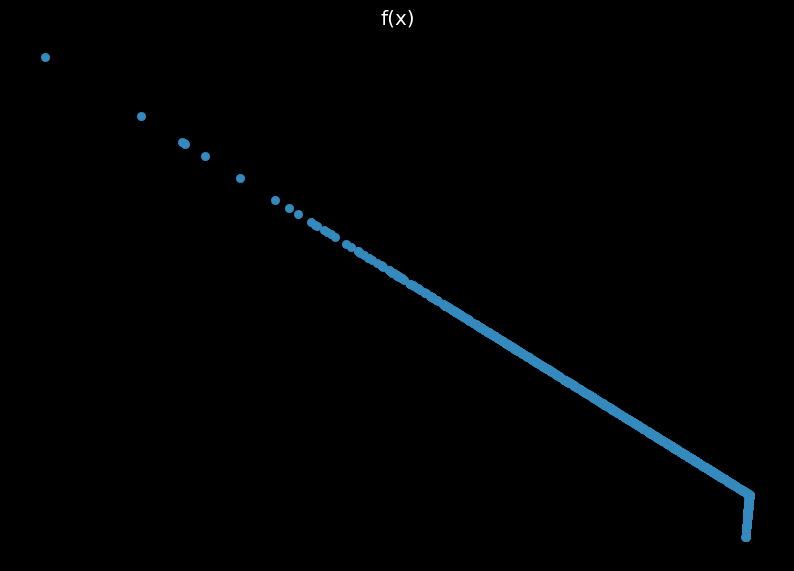

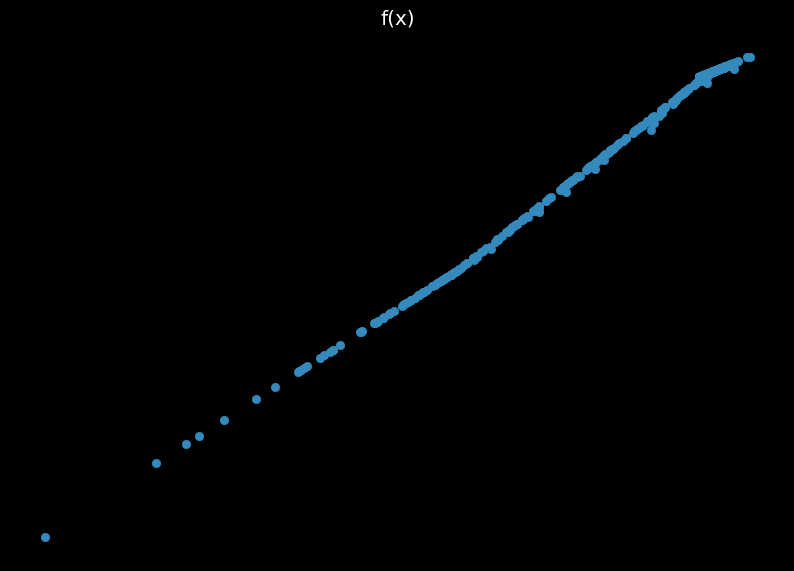

In [55]:
# a 4 hidden layer net with random weight init
plt.scatter(X[:,0],X[:,1])
plt.axis("off")
plt.title("x")
plt.show()

n_hidden = 5
#AF = nn.Tanh()
AF = nn.ReLU()

for i in range (5):
    model3 = nn.Sequential(nn.Linear(2, n_hidden), AF, 
                           nn.Linear(n_hidden, n_hidden), AF, 
                           nn.Linear(n_hidden, n_hidden), AF,
                           nn.Linear(n_hidden, n_hidden), AF,
                           nn.Linear(n_hidden, 2))
    model3.to(device)
    with torch.no_grad():
        Y = model3(X)
    plt.scatter(Y[:,0], Y[:,1])
    plt.axis("off")
    plt.title("f(x)")
    plt.show()